## Decision Trees

Decision Trees (DTs) are a **non-parametric supervised learning method** used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.

Ref: https://mlu-explain.github.io/decision-tree/ 

#### Advantages:

Some advantages of decision trees are:

- Simple to understand and to interpret. Trees can be visualized.

- Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Some tree and algorithm combinations support missing values.

- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.

- Able to handle both numerical and categorical data. However, the scikit-learn implementation does not support categorical variables for now. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.

- Able to handle multi-output problems.

- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.

- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

#### Disadvantages

The disadvantages of decision trees include:

- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- Predictions of decision trees are neither smooth nor continuous, but piecewise constant approximations as seen in the below figure. Therefore, they are not good at extrapolation.

- The problem of learning an optimal decision tree is known to be **NP-complete** under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the **greedy algorithm** where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.

- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

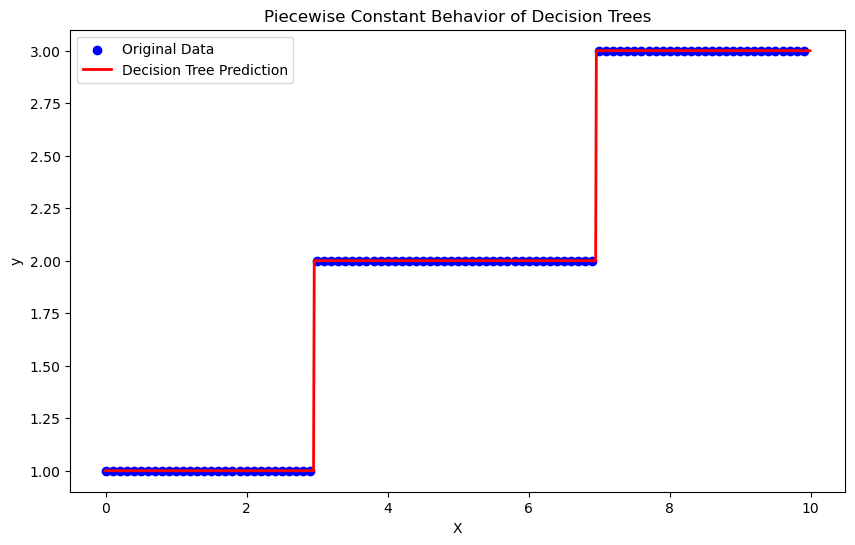

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a dataset with a step function
X = np.arange(0, 10, 0.1).reshape(-1, 1)
y = np.piecewise(X.flatten(), [X.flatten() < 3, (X.flatten() >= 3) & (X.flatten() < 7), X.flatten() >= 7], [1, 2, 3])

# Fit a decision tree regressor
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

# Predict values
X_test = np.arange(0, 10, 0.01).reshape(-1, 1)
y_pred = regressor.predict(X_test)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Decision Tree Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Piecewise Constant Behavior of Decision Trees')
plt.legend()
plt.show()


### Types of ML models based on parameters:

|Aspect|	Parametric Methods|	Non-Parametric Methods|
|-------|----------|-----------|
|Model Complexity|	Fixed number of parameters|	Number of parameters grows with data|
|Assumptions	|Assumes a specific form for the model|	No strong assumptions about data form|
|Training Data Requirements|	Less training data needed	|More training data needed|
|Examples|	Linear Regression, Logistic Regression	|Decision Trees, k-Nearest Neighbors|
|Flexibility|	Less flexible, may underfit|	More flexible, can capture complex patterns|
|Computation Time|	Generally faster|	Generally slower|
|Interpretability|	Easier to interpret and explain|	Can be harder to interpret|

#### Parametric Methods
1. Linear Regression:
- Used for predicting continuous outcomes.
- Assumes a linear relationship between the input variables (features) and the output variable (target).

2. Logistic Regression:
- Used for binary classification problems.
- Assumes a logistic relationship between the input variables and the probability of the target class.

3. Naive Bayes:
- Used for classification tasks.
- Assumes that the features are independent of each other given the class label.

4. Support Vector Machines (with linear kernel):
- Used for classification and regression tasks.
- Assumes a linear decision boundary.

####  Non-Parametric Methods
1. Decision Trees:
- Used for both classification and regression tasks.
- Does not assume any specific form for the relationship between input and output.

2. k-Nearest Neighbors (k-NN):
- Used for both classification and regression tasks.
- Makes predictions based on the similarity of input features to the k nearest training samples.

3. Random Forests:
- An ensemble of decision trees used for both classification and regression.
- Combines the predictions of multiple decision trees to improve accuracy and reduce overfitting.

4. Support Vector Machines (with non-linear kernels):
Used for classification and regression tasks.
Uses non-linear kernels (e.g., RBF) to capture complex relationships in the data.

### Types of ML Models Based on Output generated:

|Aspect|	Deterministic Methods|	Non-Deterministic Methods|
|-------|------|-----------|
|Definition	|Always produce the same output for a given input	|May produce different outputs for a given input|
|Examples|	Linear Regression, Logistic regression	|k-Nearest Neighbors, Random Forests|
|Model Behavior|	Predictable and consistent	|May vary due to randomness or different initializations|
|Training Process|	Results are repeatable and reproducible	|Results may vary with different runs|
|Use Cases|	Situations requiring high consistency and reliability	|Situations benefiting from model diversity and robustness|
|Interpretation	|Easier to interpret and understand	|Can be more complex due to variability|
|Error Handling|	Typically easier to debug|	May require more complex error handling|

#### Assumptions of Decision Trees

Decision trees are a popular machine learning algorithm due to their simplicity and interpretability. However, like all models, they come with certain assumptions and limitations. Here are some key assumptions of decision trees:

1. Recursive Partitioning:
Decision trees assume that the data can be recursively partitioned into subsets based on feature values. The model splits the data at various points to create homogeneous subgroups where the target variable is more uniform.

2. Axis-Parallel Splits:
Decision trees perform axis-parallel splits, meaning that each split is perpendicular to one of the feature axes. This can lead to a model that is not as flexible as some other algorithms, especially if the true decision boundary is not axis-aligned.

3. Feature Independence:
While not a strict assumption, decision trees tend to perform better when the features are independent of each other. If there are strong correlations between features, the tree might not capture the underlying patterns as effectively.

4. Sample Homogeneity:
Decision trees assume that splitting the data into more homogeneous groups (with respect to the target variable) will improve the model's performance. The goal is to reduce impurity (such as Gini impurity or entropy) in the resulting subsets.

5. Sufficient Data:
Decision trees require a sufficient amount of data to make meaningful splits. With limited data, the model might overfit to the training set and perform poorly on unseen data. Pruning techniques and setting minimum sample splits can help mitigate this issue.

6. Handling Missing Values:
Decision trees can handle missing values by assigning them to the most common category in a categorical feature or by using surrogate splits. However, the way missing values are handled can impact the model's accuracy.

7. Noisy Data:
Decision trees assume that the data is relatively noise-free. Noisy data can lead to overfitting, where the model captures random fluctuations instead of the underlying patterns. Techniques such as pruning, setting a maximum depth, and using ensemble methods like Random Forests can help address this.

8. Tree Depth:
Decision trees assume that increasing the depth of the tree will lead to better performance by capturing more complex patterns in the data. However, deeper trees are more prone to overfitting, so it is crucial to balance complexity with generalization.

9. Decision Boundaries:
The decision boundaries created by decision trees are piecewise constant. This means that within each partitioned region, the prediction is the same. This can limit the model's ability to capture smooth, continuous relationships.

10. Feature Scaling:
Decision trees do not assume any specific feature scaling (e.g., standardization or normalization). They can handle features on different scales naturally, as splits are based on feature values rather than their relative magnitudes.

### When not to use Decision Trees

Recursive splitting, a core principle behind decision trees and similar algorithms, might not be ideal or effective for certain types of data. Here are some examples:

1. Linear Relationships: Data where the relationship between features and target variables is purely linear (e.g., Linear Regression) might not benefit much from recursive splitting.

- Example: Predicting house prices using a simple linear model based on square footage and number of bedrooms.

2. High-Dimensional Sparse Data: Data with a large number of features but only a few of them relevant, such as in text classification or certain types of genomic data, may not exhibit recursive splitting well.

- Example: Text classification using bag-of-words or TF-IDF where the presence or absence of specific terms is crucial.

3. Small Data Sets: Very small datasets might not have enough variability to make recursive splitting meaningful.

- Example: Predicting outcomes in clinical trials with a very limited number of participants.

4. Highly Structured Data: Data that follows strict and well-defined rules or sequences, like certain time series data, may not align well with recursive splitting.

- Example: Forecasting stock prices using a time series model that do not follow clear trends and patterns.

5. Periodic Data: Data with periodicity or seasonal effects might not be effectively captured by recursive splitting techniques.

- Example: Temperature variations over a year, which follow clear seasonal patterns

#### NP-Complete Algorithms:

NP-Complete Problems: These are a class of problems in computational complexity theory. "NP" stands for "nondeterministic polynomial time". An NP-complete problem has two main properties:

- Verifiable in Polynomial Time: Given a solution, it can be verified quickly (in polynomial time).

- NP-Hard: If you can solve this problem quickly (in polynomial time), you can solve all NP problems quickly. Essentially, it is as hard as any problem in NP.

- Example: The Traveling Salesman Problem (TSP) is a classic NP-complete problem. Given a list of cities and the distances between them, the task is to find the shortest possible route that visits each city exactly once and returns to the starting point.

#### Greedy Algorithms:

- Greedy Algorithms: These algorithms make the locally optimal choice at each stage with the hope of finding the global optimum. They work step-by-step, always choosing the next piece that offers the most immediate benefit.

- Example: The Coin Change Problem where the goal is to make change for a given amount using the fewest number of coins. A greedy algorithm would always pick the largest denomination coin available until the amount is made.

#### Key Concepts:

1. Tree Structure:
- Nodes: The points where the data is split. There are three types of nodes:
- Root Node: The top-most node in a tree, representing the entire dataset.
- Internal Nodes: Nodes that represent splits based on features.
- Leaf Nodes (Terminal Nodes): Nodes that represent the final class or output value.

2. Splitting Criteria:
- Gini Impurity: Measures the impurity or impurity reduction in a dataset. It is used for classification tasks.
- Entropy: A measure of disorder or uncertainty in the dataset. It is used to calculate information gain.
- Information Gain: The reduction in entropy or impurity achieved by partitioning the dataset according to a given attribute.
- Variance Reduction: Used for regression tasks, it measures how much variance is reduced by splits.

3. Tree Building Algorithms:
- ID3 (Iterative Dichotomiser 3): Uses information gain as the splitting criterion.
- C4.5: An extension of ID3, which can handle both categorical and continuous data, and uses gain ratio for splitting.
- CART (Classification and Regression Trees): Can handle both classification and regression tasks, using Gini impurity and variance reduction.

4. Pruning Techniques:
- Pre-Pruning: Stops the tree from growing beyond a certain depth or before the tree perfectly fits the training data.
- Post-Pruning: Allows the tree to grow fully, then removes branches that have little importance or do not provide significant power in classification.

5. Feature Importance:
- Measures how significant each feature is in making predictions. It helps in understanding the most influential features in the dataset.

6. Handling Overfitting:
- Decision trees can easily overfit to the training data. To prevent overfitting:
- Pruning: As mentioned, pruning helps reduce the complexity of the model.
- Setting Minimum Samples per Leaf: Limits the growth of the tree by requiring a minimum number of samples in each leaf.
- Setting Maximum Depth: Restricts the maximum depth of the tree.

7. Ensemble Methods:
- Bagging (Bootstrap Aggregating): Combines multiple decision trees trained on different subsets of the dataset to reduce variance and improve stability.
- Random Forests: An ensemble of decision trees, where each tree is trained on a random subset of the data and features.
- Boosting: Sequentially builds trees, with each tree attempting to correct the errors of the previous one (e.g., AdaBoost, Gradient Boosting).

8. Handling Missing Values:
Decision trees can handle missing values by assigning them to the most frequent class (for classification) or average value (for regression) in a feature, or by using surrogate splits.

#### Step by Step working of DT: 

Watch this: https://youtu.be/ZVR2Way4nwQ

Step-by-Step Process of Decision Trees
1. Initialization:
Start with the entire dataset as the root node.

2. Splitting Criteria:
Determine the best feature to split the data on. This is done by selecting the feature that best separates the classes. The criteria used can be:

Gini Impurity: Measures the impurity in a dataset. The goal is to choose the feature that results in the largest reduction in impurity.

Entropy and Information Gain: Entropy measures the amount of disorder or randomness. Information gain is the reduction in entropy by partitioning the data according to a feature.

3. Selecting the Best Split:
For each feature, evaluate the following:

Gini Impurity (for classification):
$$ Gini(D) = 1 - \sum_{i=1}^{c} p_i^2 $$

where 
𝑝𝑖  is the probability of class 𝑖 in the dataset 𝐷 .

Entropy (for classification):

$$ Entropy(D) = - \sum_{i=1}^{c} p_i \log_2(p_i) $$ 

4. Performing the Split:
Divide the dataset into subsets based on the chosen feature. Each subset forms a branch of the decision tree.

5. Recursively Repeat the Process:
For each branch (subset), repeat steps 2-4:

Evaluate the remaining features.

Select the best feature to split the data.

Split the data and create new branches.

6. Stopping Criteria:
Decide when to stop splitting:

Maximum Depth: Predefine a maximum depth for the tree.

Minimum Samples per Node: Require a minimum number of samples to perform a split.

Homogeneous Nodes: Stop splitting when all the samples in a node belong to the same class.

7. Creating Leaf Nodes:
Once the stopping criteria are met, assign a class label (for classification) or a value (for regression) to the leaf nodes. These nodes represent the final decision or prediction.

8. Pruning (Optional):
Pruning helps reduce overfitting by removing branches that provide little predictive power. This can be done by:

Pre-Pruning: Stopping the growth of the tree early based on predefined criteria (e.g., maximum depth, minimum samples per node).

Post-Pruning: Allowing the tree to grow fully and then removing branches that do not improve the model's performance.

9. Making Predictions:
To make predictions for new data:

Start at the root node.

Traverse the tree by following the branches based on the feature values of the new data.

Continue until a leaf node is reached.

Assign the class label or value of the leaf node as the prediction.

10. Evaluating the Model:
Evaluate the performance of the decision tree using metrics such as accuracy, precision, recall, F1 score (for classification), and mean squared error (for regression).

Visualization:
Decision trees can be visualized, making them highly interpretable. The structure shows how decisions are made based on feature values, which is useful for understanding the model's behavior.

#### Example illustration

Let's consider a simplified dataset with the following features: Color (Red, Yellow), Size (Small, Large), and Label (Fruit, Not Fruit).

|Color|	Size|	Label|
|--------|---------|-------|
|Red|	Small|	Fruit|
|Red|	Large|	Fruit|
|Yellow	|Small	|Not Fruit|
|Yellow	|Large	|Not Fruit|

Step 1: Calculate Initial Entropy:
The dataset has 2 Fruit and 2 Not Fruit instances.

$$ Entropy(S) = - \sum_{i=1}^{c} p_i \log_2(p_i) = - \left( \frac{2}{4} \log_2 \left( \frac{2}{4} \right) + \frac{2}{4} \log_2 \left( \frac{2}{4} \right) \right) = 1 $$ 

Step 2: Calculate Information Gain for Each Feature:
    
    i. For Color:

- Red: 2 samples (2 Fruit), Entropy = 0

- Yellow: 2 samples (2 Not Fruit), Entropy = 0

Information gain(S, Color) = 1-((2/4)*0 + (2/4)*0) = 1

    ii. For Size:

- Small: 2 samples (1 Fruit, 1 Not Fruit), Entropy = 1
- Large: 2 Samples (1 Fruit, 1 Not Fruit), Entropy = 1

Information gain(S, Color) = 1-((2/4)*1 + (2/4)*1) = 0

Hence color has the highest information gain, so we split on Color

Step 3: Split the data on Color:
- Red: 2 Samples (2 Fruit)
- Yellow: 2 samples (2 Not Fruit)

### DecisionTree Classifier

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



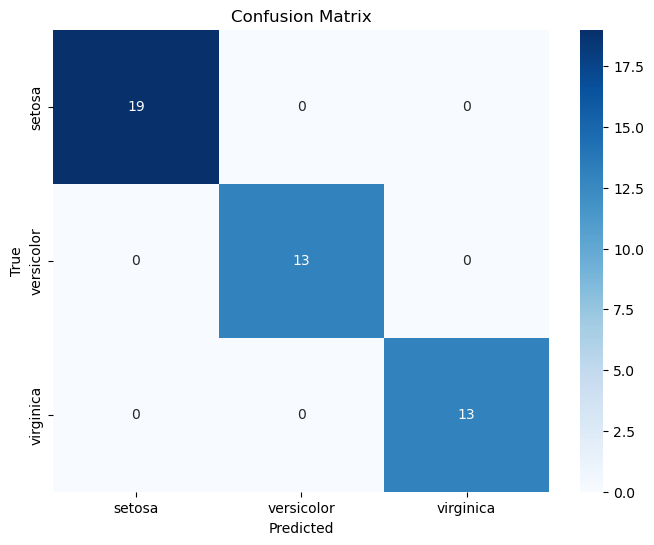

C:\Users\Sadiq Pasha\AppData\Local\Temp\ipykernel_46304\2467624718.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette='viridis')


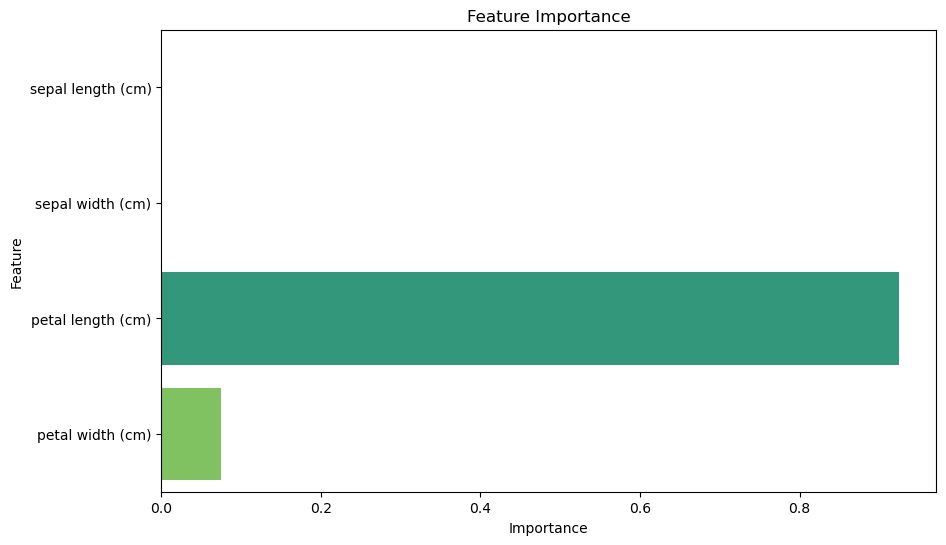

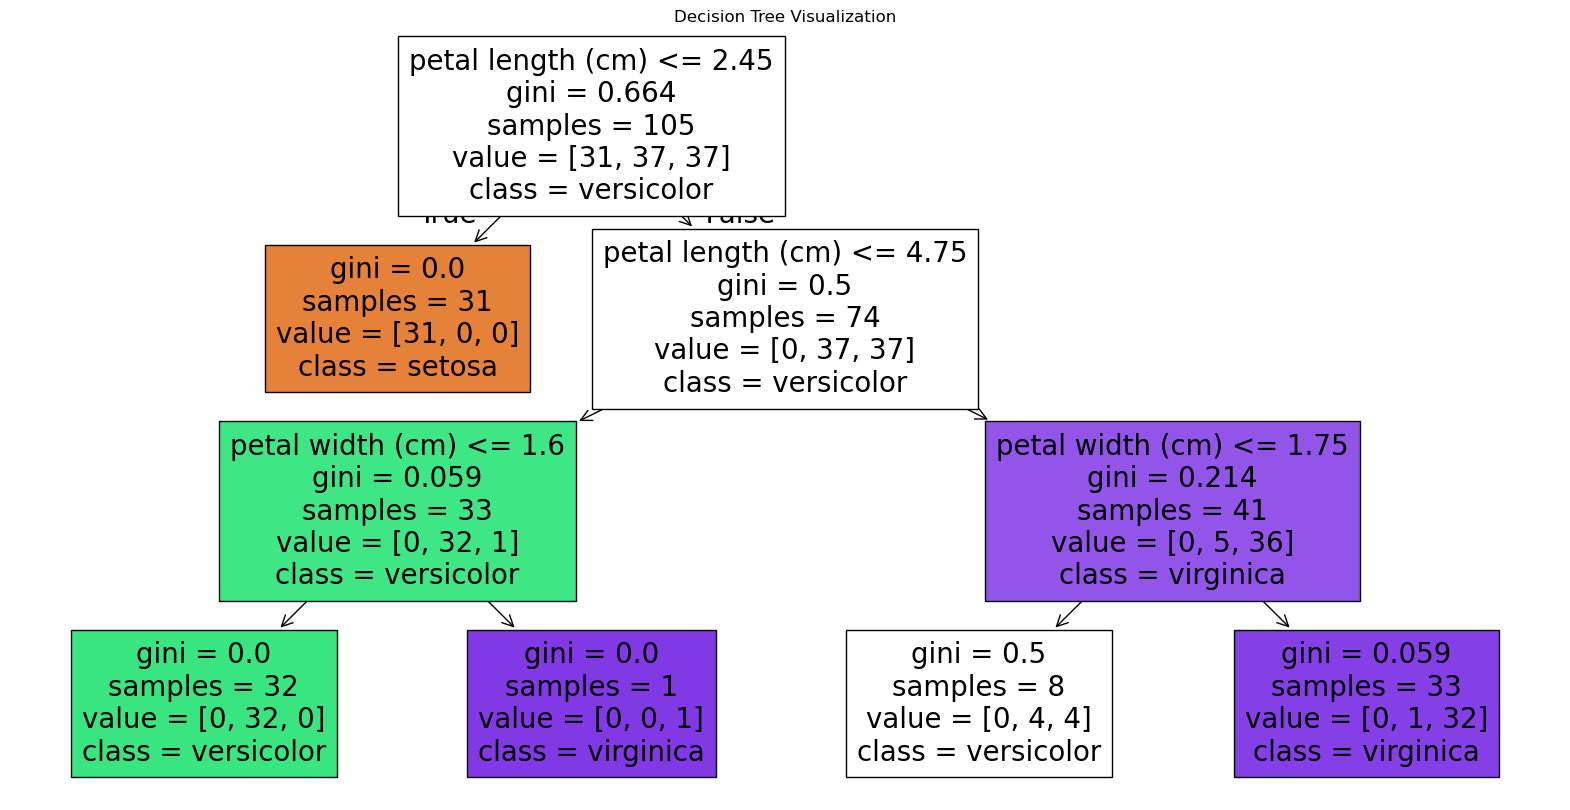

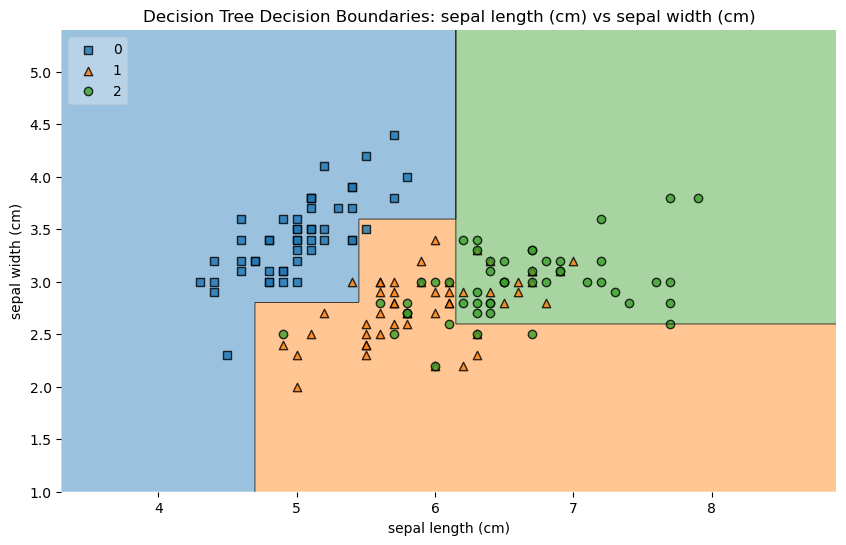

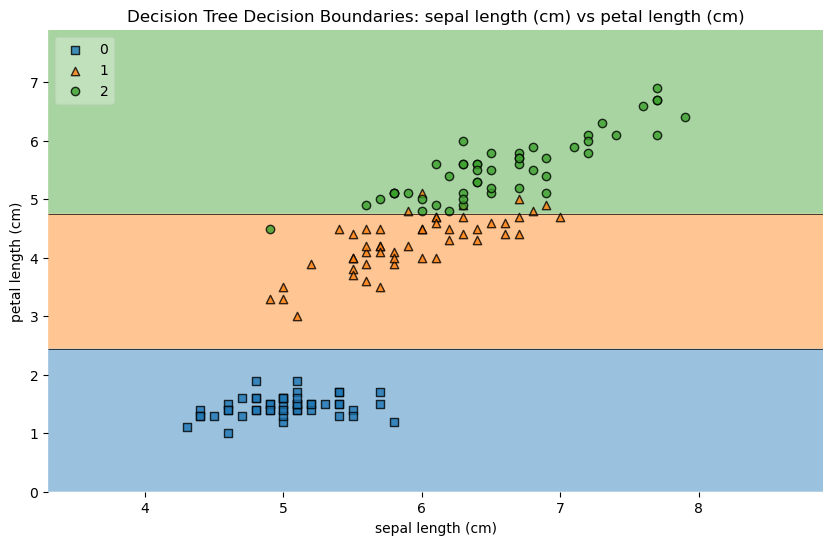

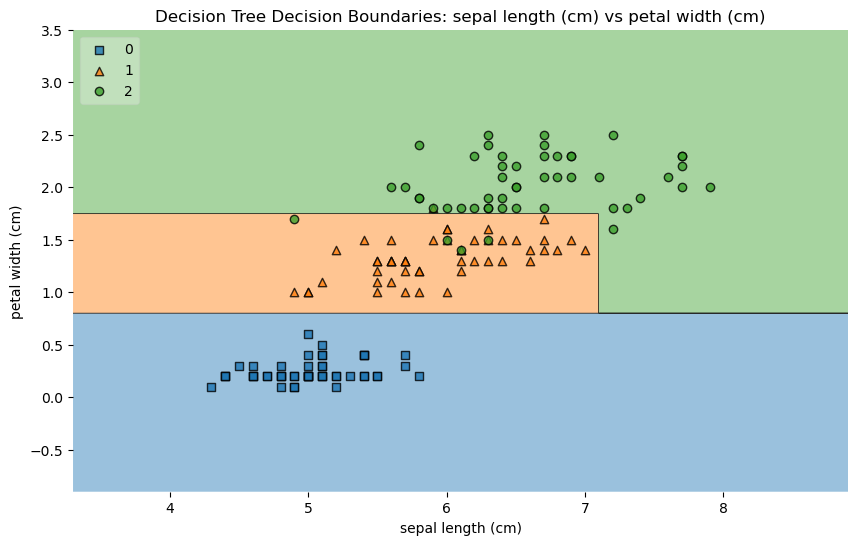

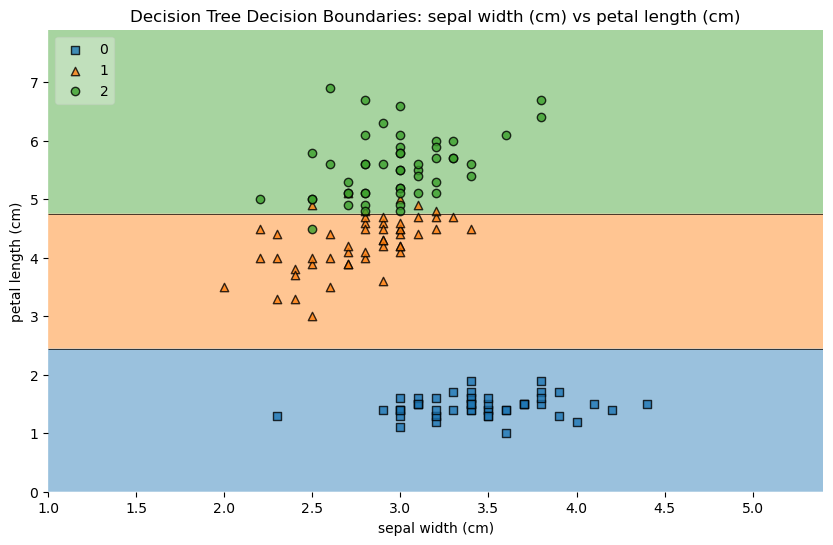

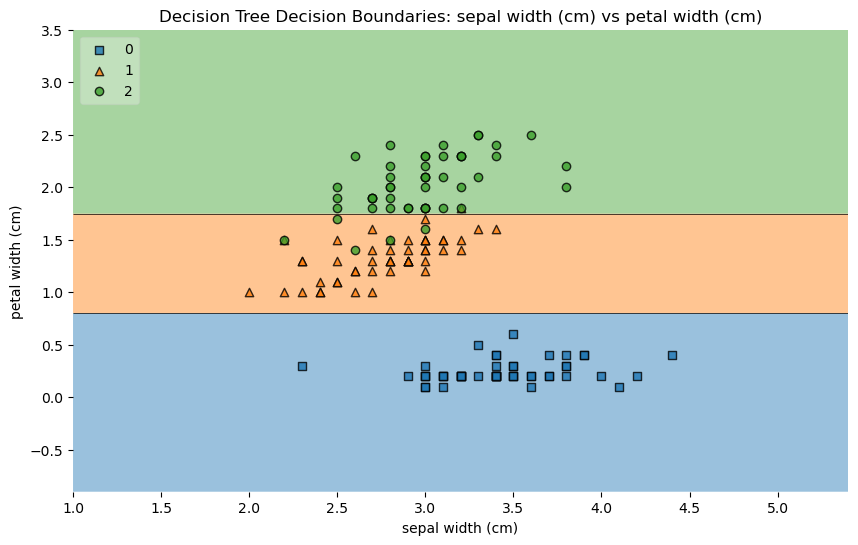

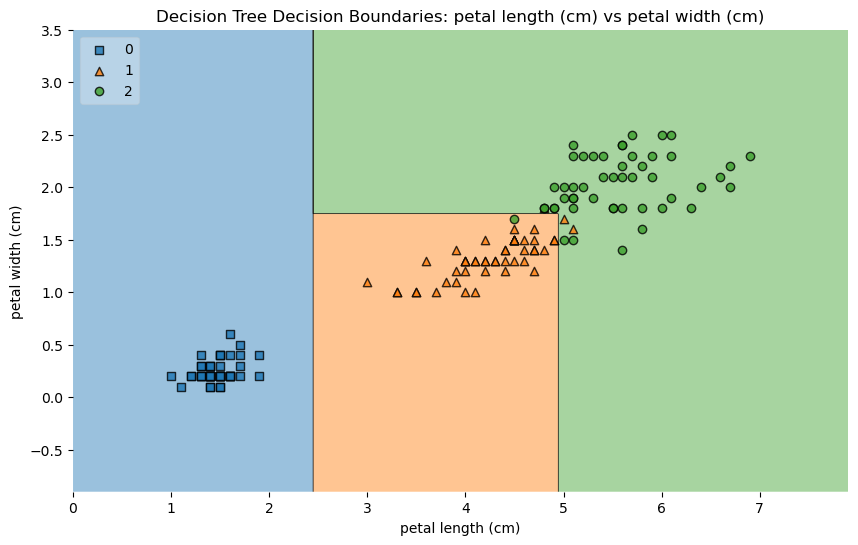

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions
from itertools import combinations
import seaborn as sns

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Using all features
y = iris.target

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Fit a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Make predictions and calculate accuracy
y_pred = clf.predict(X_test)

# Step 5: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


# Step 7: Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Plot feature importance
feature_importances = clf.feature_importances_
features = iris.feature_names

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

# Step 9: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Step 10: Plot Decision Boundaries for each pair of features
feature_combinations = list(combinations(range(X.shape[1]), 2))
for comb in feature_combinations:
    X_comb = X[:, comb]
    X_train_subset = X_train[:, comb]
    clf.fit(X_train_subset, y_train)

    plt.figure(figsize=(10, 6))
    plot_decision_regions(X_comb, y, clf=clf, legend=2)
    plt.xlabel(iris.feature_names[comb[0]])
    plt.ylabel(iris.feature_names[comb[1]])
    plt.title(f'Decision Tree Decision Boundaries: {iris.feature_names[comb[0]]} vs {iris.feature_names[comb[1]]}')
    plt.show()
